In this task, you will build four models to classify the images in the Fashion-MNIST dataset.
(1) logistic regression
(2) Random Forest
(3) MLP (do NOT use sklearn MLPClassifier)
(4) 2D CNN

Compare the performance, and find the best one.
do hyperparameter optimization (at least one parameter for each model, except (1)). For model (1), you
do not need to do hyperparameter optimization. You will get zero score if there is no hyperparameter
optimization for the models (2)-(4).

some suggestions:
Random Forest hyperparameter: max_depth
MLP hyperparameter: the number of layers
2D CNN: the number of training epochs

- Do NOT copy the existing models from Github. (if you do so, you will get zero score).
- Do NOT use test set for hyperparameter optimization. (if you do so, you will get zero score).
- Do NOT fit model to the test dataset (if you do so, you will get zero score).
- Do NOT use weighted accuracy because there is no class-imbalance.


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=0)

print('train:', train_images.shape, train_labels.shape)
print('test:', test_images.shape, test_labels.shape)
print('validation:', val_images.shape, val_labels.shape)

train: (54000, 28, 28) (54000,)
test: (10000, 28, 28) (10000,)
validation: (6000, 28, 28) (6000,)


In [3]:
train_images = train_images.reshape(54000, (28*28))
test_images = test_images.reshape(10000, (28*28))
val_images = val_images.reshape(6000, (28*28))

print('train:', train_images.shape, train_labels.shape)
print('test:', test_images.shape, test_labels.shape)
print('validation:', val_images.shape, val_labels.shape)


#apply feature normalization to training, validation and test sets
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_images) # think about why fit to X_train, not X ?
train_images=scaler.transform(train_images)
val_images=scaler.transform(val_images)
test_images=scaler.transform(test_images)

train: (54000, 784) (54000,)
test: (10000, 784) (10000,)
validation: (6000, 784) (6000,)


# LOGISTIC REGRESSION

In [9]:
from sklearn.linear_model import LogisticRegression
#set class_weight='balanced'
LR=LogisticRegression(penalty='none', class_weight='balanced', random_state=0, n_jobs=-1, verbose=3)
LR.fit(train_images, train_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


LogisticRegression(class_weight='balanced', n_jobs=-1, penalty='none',
                   random_state=0, verbose=3)

In [10]:
LR_test_pred=LR.predict(test_images)
LR_test_score = LR.score(test_images, test_labels)

LR_val_pred=LR.predict(val_images)
LR_val_score = LR.score(val_images, val_labels)
print('classification accuracy on test set is ', LR_test_score)
print('classification accuracy on validation set is ', LR_val_score)

classification accuracy on test set is  0.8454
classification accuracy on validation set is  0.8536666666666667


# RANDOM FOREST

In [12]:
from sklearn.ensemble import RandomForestClassifier
#set n_estimators=20, class_weight='balanced', max_depth=20, and random_state=0
#your code here
#-----------
RF=RandomForestClassifier(n_estimators=20, class_weight='balanced', max_depth=20, random_state=0)
RF.fit(train_images, train_labels)

test_labels_pred=RF.predict(test_images)
RF_test_score = RF.score(test_images, test_labels)

val_labels_pred=RF.predict(val_images)
RF_val_score = RF.score(val_images, val_labels)

print('classification accuracy on validation set is ', RF_test_score)
print('classification accuracy on test set is ', RF_val_score)

classification accuracy on validation set is  0.8659
classification accuracy on test set is  0.873


In [14]:
import numpy as np
#create an array of possible max_depth
# you may need the function np.arange
# The minimum value of max_depth is 1, obviously.
# assume the name of the array is max_depth_list

max_depth_list = np.arange(1, 40)
max_depth_list

#train a RandomForestClassifier with max_depth in max_depth_list
#inside a for loop: 
#   create a model with a max_depth in max_depth_list
#   set class_weight to 'balanced', n_estimators=20
#   set random_state=0 so that the result is reproducible
#   train the model on the training set
#   record the accuracy on the training set into a list acc_train_list
#   record the accuracy on the validation set into a list acc_val_list
test_score_list=[]
val_score_list=[]

for max_depth in max_depth_list:
    RF=RandomForestClassifier(n_estimators=20, class_weight='balanced', max_depth=max_depth, random_state=0)
    RF.fit(train_images, train_labels)

    test_labels_pred=RF.predict(test_images)
    test_score_list.append(RF.score(test_images, test_labels))
    

    val_labels_pred=RF.predict(val_images)
    val_score_list.append(RF.score(val_images, val_labels))

NameError: name 'plt' is not defined

[0.3581, 0.5791, 0.6701, 0.7305, 0.7561, 0.7875, 0.7992, 0.8174, 0.832, 0.8428, 0.8465, 0.8494, 0.858, 0.8578, 0.8626, 0.8621, 0.8641, 0.8625, 0.8622, 0.8659, 0.8661, 0.8631, 0.8625, 0.8654, 0.8644, 0.8644, 0.8664, 0.8634, 0.8639, 0.8629, 0.8648, 0.8644, 0.8655, 0.8671, 0.8626, 0.8677, 0.8656, 0.8628, 0.8639]
[0.3453333333333333, 0.5728333333333333, 0.6826666666666666, 0.7383333333333333, 0.7638333333333334, 0.7983333333333333, 0.8116666666666666, 0.8295, 0.8406666666666667, 0.8531666666666666, 0.8578333333333333, 0.8601666666666666, 0.8698333333333333, 0.8733333333333333, 0.8743333333333333, 0.8811666666666667, 0.8748333333333334, 0.8748333333333334, 0.873, 0.873, 0.8761666666666666, 0.8786666666666667, 0.8796666666666667, 0.877, 0.8733333333333333, 0.8768333333333334, 0.878, 0.8773333333333333, 0.8723333333333333, 0.8748333333333334, 0.877, 0.8756666666666667, 0.8783333333333333, 0.8731666666666666, 0.8768333333333334, 0.8756666666666667, 0.8751666666666666, 0.8751666666666666, 0.877

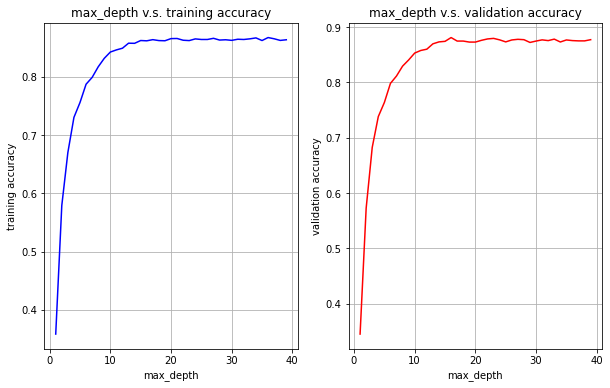

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
#plot max_depth vs acc_train using max_depth_list and acc_train_list
#plot max_depth vs acc_val using max_depth_list and acc_val_list
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, test_score_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].grid(True)
ax[1].plot(max_depth_list, val_score_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].grid(True)
    
print(test_score_list)
print(val_score_list)
max_depth_best = max_depth_list[np.argmax(val_score_list)]
print(max_depth_best)

#now, we use the best max_depth to build a RandomForestClassifier
#train it on the training set and evaluate it on the testing set
RF=RandomForestClassifier(n_estimators=20, class_weight='balanced', max_depth=max_depth_best, random_state=0)
RF.fit(train_images, train_labels)

test_labels_pred=RF.predict(test_images)
RF_test_score = RF.score(test_images, test_labels)

val_labels_pred=RF.predict(val_images)
RF_val_score = RF.score(val_images, val_labels)
print('classification accuracy on validation set is ', RF_test_score)
print('classification accuracy on test set is ', RF_val_score)

# MLP

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

#use binary_crossentropy
MLPBase = Sequential()
MLPBase.add(Dense(units=256, activation='relu', input_shape=(10,)))
MLPBase.add(Dense(units=256, activation='relu'))
MLPBase.add(Dense(units=256, activation='relu'))
MLPBase.add(Dense(units=1,  activation='sigmoid'))
MLPBase.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.0005, momentum=0.9),
              metrics=['accuracy'])
MLPBase.summary()

for epoch in range(0, 10):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(X_train, Y_train, batch_size=64, epochs=1, validation_data=(X_val, Y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.append(test_acc(model, X_val, Y_val)[0])
    #save the model to a a HDF5 file 
    model.save('H5_Keras_e'+str(epoch)+'.h5')